<h1>Theoretical Foundations, Continued</h1>
<h1>Chapter 4:  Classical Statistical Inference (4.1-4.4)</h1>
<hr/>

<h2>4.2 Maximum Likelihood Estimation (MLE)</h2>

<h3>4.2.1-4.2.2 The Likelihood Function</h3>

What's the idea?  A set of data is a sample drawn from some distribution.  As such, each datum has a probabilty; if we make the assumption that these probabilities are independent, we arrive fairly intuitively at the measure of likelihood for the sample:

$$L \equiv p(\{x_i\}|M(\vec{\theta})) = {\displaystyle \prod_{i=1}^{n}} p(x_i|M(\vec{\theta})) \tag{4.1}$$

where $M$ is the model (the distribution the data is drawn from), and $\vec{\theta}$ are the parameters the model takes.

Note:
<list>
<li>$L$ is not a PDF as it is not normalized</li>
<li>In fact, commonly $L\ll 1$, which leads to the use of Log-likelihood, $ln(L)$
<li>$L$ can be considered both as a function of the model/distribution parameters, with fixed $\{x_i\}$, the case when trying to maximize it; or as a function of $x$, with fixed model parameters, when calculating the likelihood of some value.
</list>

"All" that needs now be done is take the derivative $L$ (or $ln(L)$), set to zero, and solve for the parameters giving the maximum.  Once this is done, confidence estimates for the parameters can be determined, either analytically or (more likely) numerically.  Finally, hypothesis tests/goodness of fit must be determined.

<h3>4.2.4 Properties of Maximum Likelihood Estimators</h3>

Assuming that the model $M$ truly is the correct class of distribution from which data ${x_i}$ are drawn, MLE's have several optimality properties.
<list>
<li>They are consistent, converging to the true value as data points increase</li>
<li>They are asymptotically normal:  the distibution of the parameter estimate approaches a normal distribution about the MLE as data points increase; the spread($\sigma$) of this distribution can be used as a confidence interval about the estimate.</li>
<li>They achieve the minimum possible variance given the data at hand</li>
</list>

<h3>4.2.3 The Homoscedastic Gaussian Likelihood</h3>

Given $N$ measurements, $\{x_i\}$, with a known, identical, normal error $\sigma$ the likelihood function becomes:

$$L \equiv p(\{x_i\}|\mu,\sigma) = {\displaystyle \prod_{i=1}^{N}} \frac{1}{\sqrt{2\pi\sigma}} exp\left(\frac{-(x_i - \mu)^2}{2\sigma^2}\right) \tag{4.2}$$

with only one parameter, $\vec{\theta}=(\mu)$, or simply $\theta=\mu$.

Using the log-likelihood here is doubly useful; besides rendering tiny numbers more numerical/computationally managable, here, analytically, it turns multiplications into additions, and those additions are logs of exponentials, so that:

$$ln(L)={\displaystyle \sum_{i=1}^{N}} ln\left(\frac{1}{\sqrt{2\pi\sigma}} exp\left(\frac{-(x_i - \mu)^2}{2\sigma^2}\right)\right) = {\displaystyle \sum_{i=1}^{N}}\left( ln\left(\frac{1}{\sqrt{2\pi\sigma}}\right) + \frac{-(x_i - \mu)^2}{2\sigma^2}\right) \tag{D1}$$

or

$$ln(L(\mu))=constant-{\displaystyle \sum_{i=1}^{N}} \frac{(x_i - \mu)^2}{2\sigma^2} \tag{4.4}$$

Setting the derivative (by the only parameter, $\mu$) equal to zero gives:

$$\frac{d~ln(L(\mu))}{d~\mu}=-{\displaystyle \sum_{i=1}^{N}} \frac{-2(x_i - \mu)}{2\sigma^2}=0 \implies {\displaystyle \sum_{i=1}^{N}} (x_i - \mu) = 0 \tag{D2}$$

or

$$\mu_{mle} = \frac{1}{N}{\displaystyle \sum_{i=1}^{N}}x_i \tag{4.5}$$

As expected, as it should be.

<h3>4.2.6 The Heteroscedastic Gaussian Likelihood</h3>

Rather than the case of equation (4.4), we now have different errors per datum, $\sigma_i$:

$$ln(L(\mu))=constant-{\displaystyle \sum_{i=1}^{N}} \frac{(x_i - \mu)^2}{2\sigma_i^2} \tag{4.8}$$

from which, with $w_i = \sigma_i^{-2}$, and following (D2) above:

$$\mu_{mle} = \frac{\displaystyle \sum_{i=1}^{N}w_i x_i}{\displaystyle \sum_{i=1}^{N}w_i} \tag{4.5}$$

aka, simply the weighted mean.

<h3>4.2.5 MLE Confidence Intervals</h3>

Given a maximum likelihood estimate of e.g. $\mu_{mle}$ as above, what is its uncertainty?

$$\sigma_{jk} = \left( - \frac{d^2 ~ln(L(\theta))}{d~\theta_j d\theta_k} \right)^{-1/2} \tag{4.6}$$

for $\theta=\vec{\theta}_{mle}$.  For why this is, the text refers the reader to the Wasserman textbooks (after a brief description.)  Without the why: the diagnonal elements $\sigma_{ii}$ correspond to marginal errors for $\theta_i$, while the $\sigma_{ij}$ with $i \neq j$ indicate correlation of errors for $\theta_i$ and $\theta_j$.

For the Guassian cases,

$$\sigma_{\mu} = \left(- \frac{d^2 ~ln(L(\mu))}{d~\mu^2} \right)^{-1/2} = \left({\displaystyle \sum_{i=1}^{N}\frac{1}{\sigma_i^2}}\right)^{-1/2} \tag{4.7/4.10}$$

<h3>4.2.7 MLE in the Case of Truncated and Censored Data</h3>

A variable to be measured, x, has some range of possible values; due to e.g. the measuring aparatus used, the range of values is not sampled uniformly.  So: $S(x) \neq c$, where $S$ is the PDF for sampling x.  In particular, for some values of $x$, $S(x)=0$.  When this last is true for some $x<x_{min}$ and/or $x > x_{max}$, the data set is said to be truncated.  (Censored data is where data has been removed for some reason.)

If we take the Gaussian case, and the simple truncation $$S(x) = \left\{\begin{array}{ll}c & x_{min} \leq x \leq x_{max} \\ 0 & otherwise \\ \end{array} \right. $$ with $c$ a constant to make $S(x)$ sum to 1.

The probability distribution for $x$ needs to be renormalized to account for this truncation:  $p(x)$ needs to be scaled to become $C~p(x)$ such that $1 = {\displaystyle \int_{-\infty}^{\infty}} C~p(x)$  For this example case this is simple:

$$C = C(\mu, \sigma, x_{min}, x_{max}) = \frac{1}{P(x_{max}|\mu, \sigma) - P(x_{min}|\mu, \sigma)} \tag{4.12}$$

leading to a log-likelihood of:

$$ln(L(\mu))=constant -{\displaystyle \sum_{i=1}^{N}} \frac{(x_i - \mu)^2}{2\sigma^2} + N~ln(C(\mu, \sigma, x_{min}, x_{max})) \tag{4.13}$$

<h3>4.2.8 Beyond the Likelihood:  Other Cost Functions and Robustness</h3>

MLE represents the most common choice of cost functions.  The expectation value of the cost function is called "risk."  Minimizing risk is a way to obtain best-fit parameters.

The mean integrated square error (MISE),

$$MISE = \displaystyle \int_{-\infty}^{\infty} [f(x) - h(x)]^2 d~x \tag{4.14}$$

is often used.  MISE is based on Mean Squared Error (MSE), aka the $L_2$ norm.  A cost function minimizing the absoluate deviation is called the $L_1$ norm.  Many cost functions, with different properties; a particularly useful example of a property is robustness to outliers.

In chapters 6-10 cost functions will be important for various methods; this is particularly true when formalizing the likelihood function is difficult, because an optimal solultion can still eb found by minimizing the risk.

<h2>4.3 The Goodness of Fit and Model Selection</h2>

MLE estimates the best-fit parameters and gives us their uncertainties, but does not tell us how good a fit the model/parameters are.  What if a Gaussian model was choosen by e.g. the truth was Laplacian?  And what if a polynomial is being fit:  a higher order polynomial will always fit data better than a lower order polynomial, but is the higher order polynomial a better fit to the underlying process (e.g., are we just fitting noise or actually fitting additional complexity in the underlying distribution/process?)

<h3>4.3.1 The Goodness of Fit for a Model</h3>

In the Gaussian case, we have (4.4):

$$ln(L(\mu))=constant-{\displaystyle \sum_{i=1}^{N}} \frac{(x_i - \mu)^2}{2\sigma^2} \tag{4.4}$$

which may be re-written with $z_i=(x_i - \mu)/\sigma$ as

$$ln(L(\mu))=constant-{\displaystyle \sum_{i=1}^{N}} z_i^2 = constant - \frac{1}{2}\chi^2 \tag{4.15}$$

and hence the distibution of $ln(L)$ can be determined from the $\chi^2$ distribution with $N-k$ degrees of freedom, with $k$ model parameters.  With an expectation value of $N-k$, for a "good fit" we should have $\chi_{dof}^2=\frac{\chi^2}{N-k} \approx 1$  (As in chapter 3, the warning here is that $\chi$ is very sensitive to outliers.)

The probability that a certain ML value $L_{mle}$ arose by chance can only be evaluated by $\chi^2$ when the likelihood is Gaussian; otherwise $L_{mle}$ is still a measure of how well a model fits the data.  Asssuming the same $k$, models can be ranked by their likelihood.  But the $L_{mle}$ value(s) alone do not indicated in an <i>absolute</i> sense how well the model(s) fit the data; to know that requires knowing the distribution of $L_{mle}$, as given by $\chi^2$ for a Gaussian likelihood.

<h3>4.3.2 Model Comparison</h3>

The best way to compare models is cross-validation, but this topic is covered in detail in later chapters.

The Aikake Information Criterion (AIC) is a simple method for comparing models that (attempts to) accounts for model complexity in addition to $L_{mle}$ when comparing models.  AIC is defined as:

$$AIC \equiv -2~ln(L_{mle}) + 2k + \frac{2k(k+1)}{N-k-1} \tag{4.17}$$

or

$$AIC = \frac{2~k~N}{N-(k+1)} - 2~ln(L_{mle})$$

Out of multiple possible models, the one with the smallest AIC is the best.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def AIC(LNL, N):
    return -2 * LNL + 2.0 * N / (N - 2.0)
def Gauss(X,M,S):
    c = np.power((np.sqrt(2*np.pi)*S),-1)
    e = -np.power(X-M,2)/(2*np.power(S,2))
    return c*np.exp(e)

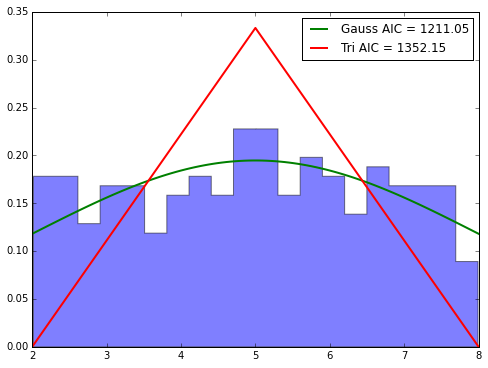

In [4]:
#We will be needing the Gaussian error function
import scipy.special as spec

#Generating points from a gaussian distribution and truncating
D = np.random.normal(5,3,500)
D = D[D>=2]
D = D[D<=8]

#Creating triangle function likelihood terms
#Assuming we guessed X0 to be the value used in generation
t = np.zeros(len(D))
for i in range(len(D)):
    if D[i] < 2 or D[i] > 8:
        pass
    elif D[i] < 5:
        t[i] = np.log((D[i]-2)/9.0)
    else:
        t[i] = np.log((8-D[i])/9.0)
Taic = AIC(np.sum(t), len(D))

#Calculating (truncated) gaussian likelihood
#Assuming we guessed X0 to be the value used in generation
const = np.power(spec.erf(3.0/(np.sqrt(2)*3)),-1)
#(3.48) Simplified as abs(xmin-mu) = abs(xmax-mu)
Gaic = AIC(len(D) * np.log(1/(np.sqrt(2*np.pi)*3)) -
           np.sum(np.power(D-5,2)/(2*np.power(3,2))) +
           len(D) * np.log(const), len(D))

#Plotting data against probability densities
x1 = np.linspace(2,8,100)
y1 = const * Gauss(x1,5,3)
x2 = np.array([2,3,4,5,6,7,8])
y2 = np.array([0,1,2,3,2,1,0])/9.0
plt.figure(figsize = (8,6))
plt.hist(D, bins = 20, normed = True, histtype='stepfilled', alpha = 0.5)
plt.plot(x1,y1, linewidth = 2, label = "Gauss AIC = {:.2f}".format(Gaic))
plt.plot(x2,y2, linewidth = 2, label = "Tri AIC = {:.2f}".format(Taic))
plt.legend()
plt.show()

<h2>4.4 ML Applied to Gaussian Mixtures:  The Expectation Maximization Algorithm</h2>

A special case of a complex likelihood which can still be maximized simply (and treated analytically) is a mixture of Gaussians.

<h3>4.4.1 Gaussian Mixture Model</h3>

For a model made up of $M$ Gaussians the likelihood of a given datum $x_i$ is:

$$p(x_i|\vec{\theta}) = {\displaystyle \sum_{i=1}^{M} \alpha_j ~ \mathcal{N}(\mu_j, \sigma_j)} \tag{4.18}$$

where, because we require each point to be drawn from a true pdf, the normalization constants $\alpha_j$ must sum to 1.  The log-likelihood is then:

$$ln(L)={\displaystyle \sum_{i=1}^{N} ln \left( {\displaystyle \sum_{i=1}^{M} \alpha_j ~ \mathcal{N}(\mu_j, \sigma_j)} \right)} \tag{4.20}$$

with $k=3M-1$ parameters.

<h3>Class Labels and Hidden Variables</h3>

A variety of more advanced methods are available for maximizing $ln(L)$, but a fast and and realatively easy method is "hidden variables".  Each of the $M$ Guassians above are interpreted as a class such that any individual $x_i$ was generated by one and only one Gaussian.  The hidden variable is $j$, identifying which class each $x_i$ belongs to.  If each point's class is known, the problem resolves to $M$ separate MLE problems with Guassian models, as developed so far.  The fraction of points in each class would be an estimator for the corresponding normalization factor, $\alpha_j$.  When the class labels are known but the underlying distribution is not Gaussian, the "naive Bayesian classfier" ($\S$ 9.3.2) can be used.

Continuing with the Gaussian case here, using Bayes' rule we find the probability of a given class for a given $x_i$:

$$p(j|x_i)=\frac{\alpha_j ~ \mathcal{N}(\mu_j,\sigma_j)}{\displaystyle \sum_{j=1}^{M} \alpha_j ~ \mathcal{N}(\mu_j, \sigma_j)} \tag{4.21}$$

or

$$p(j|x_i) = \frac{\alpha_j ~ p(x_i|\mu_j,\sigma_j)}{\displaystyle \sum_{j=1}^{M} \alpha_j~p(x_i|\mu_j, \sigma_j)} = \frac{p(j) ~ p(x_i|\mu_j,\sigma_j)}{p(x_i)}
\tag{D3}$$

How to use (4.21) and (4.20) to come up with a way to handle this?

<h3>4.4.3 The Basics of the Expectation Maximization Algorithm</h3>

Replacing $\mathcal{N}(\mu_j, \sigma_j)$ with the general $p_j(x_i|\vec{\theta})$ in (4.20) and taking the partial derivative with respect to $\theta_j$, then rearranging gives:

$$\frac{\partial~ln(L)}{\partial~\theta_j} = {\displaystyle \sum_{i=1}^{N} \left( \frac{\alpha_j~p_j(x_i|\vec{\theta})}{\displaystyle \sum_{j=1}^{M} \alpha_j~p(x_i|\vec{\theta})} \right)} \left( \frac{1}{p_j(x_i|\vec{\theta})} \frac{\partial~p_j(x_i|\vec{\theta})}{\partial~\theta_j} \right) \tag{4.24}$$

where the first part is just (4.21/D3).  For the EM algorithm we assume this is fixed during each iteration; this whole term is then replaced with $w_{ij}$.  The second part is just a partial of the $ln(p_j(x_i|\vec{\theta}))$ and, when Gaussian as in our work so far, gives:

$$\frac{\partial~ln(L)}{\partial~\theta_j} = -{\displaystyle \sum_{i=1}^{N}} w_{ij} \frac{\partial}{\partial~\theta_j} \left( ln(\sigma_j) + \frac{(x_i - \mu_j)^2}{2~\sigma_j^2} \right)$$

and leads to the estimators for $\mu_j$, $\sigma_j$, and $\alpha_j$:

$$\mu_j = \frac{\displaystyle \sum_{i=1}^{N} w_{ij} x_i}{\displaystyle \sum_{i=1}^{N} w_{ij}} \tag{4.26}$$

$$\sigma_j^2 = \frac{\displaystyle \sum_{i=1}^{N} w_{ij}(x_i-\mu_j)^2}{\displaystyle \sum_{i=1}^{N} w_{ij}} \tag{4.27}$$

and (somewhat circularly)

$$\alpha_j = \frac{1}{N}{\displaystyle \sum_{i=1}^{N} w_{ij}} \tag{4.28}$$

The EM algorithm starts with a guess for $w_{ij}$, then the maximization step (M-step) of evaluating (4.26-4.28), then a expectation step (E-step) of updating $w_{ij}$ based on the M-step outputs.  The M-step and E-step are run iteratively until convergence, iteration limit, etc.

Similar to overfitting with e.g. a high-degree polynomial, setting M too high will e.g. split data that should be classed together.  Choosing the appropriate M is a case of model selection, and AIC (or BIC, later) should be applied.

So far this has been for homoscedastic errors.  Handling heteroscedastic errors can be done by replacing the $\sigma_j$ with $(sigma_j^2 + e_i^2)^(1/2)$ where $sigma_j$ is now the width of each class $j$ and $e_i$ the measurement error for each value.  Now the M-step involves an explicit equation to update $\mu_j$ and an implicit equation for $\sigma_j$ that requires a numerical solution:

$$\mu_j = \frac{\displaystyle \sum_{i=1}^{N} \frac{w_{ij}}{\sigma_j^2 + e_i^2} x_i}{\displaystyle \sum_{i=1}^{N} \frac{w_{ij}}{\sigma_j^2 + e_i^2}} \tag{4.30}$$

and

$${\displaystyle \sum_{i=1}^{N} \frac{w_{ij}}{\sigma_j^2 + e_i^2}} = {\displaystyle \sum_{i=1}^{N} \frac{w_{ij}}{(\sigma_j^2 + e_i^2)^2}(x_i - \mu_j)^2} \tag{4.31}$$

Further discussion of this and similar problems (involving mixutre models) is dicussed in $\S$5.6.1 and in chapter 6.

/home/kenny/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


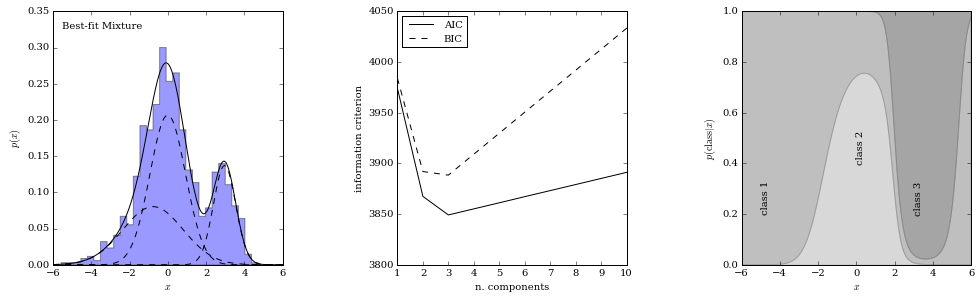

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GMM

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex=False)

#------------------------------------------------------------
# Set up the dataset.
#  We'll use scikit-learn's Gaussian Mixture Model to sample
#  data from a mixture of Gaussians.  The usual way of using
#  this involves fitting the mixture to data: we'll see that
#  below.  Here we'll set the internal means, covariances,
#  and weights by-hand.
np.random.seed(1)

gmm = GMM(3, n_iter=1)
gmm.means_ = np.array([[-1], [0], [3]])
gmm.covars_ = np.array([[1.5], [1], [0.5]]) ** 2
gmm.weights_ = np.array([0.3, 0.5, 0.2])

X = gmm.sample(1000)

#------------------------------------------------------------
# Learn the best-fit GMM models
#  Here we'll use GMM in the standard way: the fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GMM(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

#------------------------------------------------------------
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(15, 5.1))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob, responsibilities = M_best.score_samples(x)         #GMM.eval is now GMM.score_samples
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, normed=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = M_best.predict_proba(x)
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()

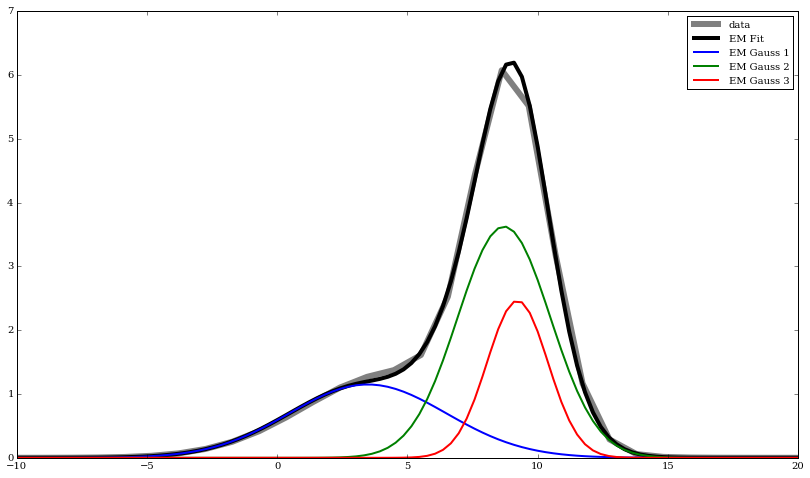

In [6]:
#Seting up random addition of 3 Gaussians
xgen = np.linspace(-10, 20, 30)
mgen = np.random.choice(np.arange(11), 3)
sgen = np.random.choice(np.linspace(0.5,3.5,50), 3)
agen = np.random.choice(np.linspace(5,25,50), 3)
ggen = np.zeros(len(xgen))
for i in range(3):
    ggen = ggen + agen[i] * Gauss(xgen,mgen[i], sgen[i])

#Setting number of gaussians to fit
J = 3
#Setting starting guess values for mu, sigma, alpha
avg = np.sum(xgen*ggen) / np.sum(ggen)
var = np.sum(ggen*np.power(xgen-avg,2)) / (np.sum(ggen))
std = np.sqrt(var)
s = std * np.ones(J)
a = np.ones(J) / J
m = np.random.choice(xgen, J)
w = np.zeros((J,len(xgen)))
sig = np.zeros(J, dtype = bool)
mu = np.zeros(J, dtype = bool)
alph = np.zeros(J, dtype = bool)

#Start iterating over function
for k in range(50):
    for j in range(J):
        for i in range(len(xgen)):
            #Creating omega matrix
            w[j][i] = (a[j] * Gauss(xgen[i], m[j], s[j]) /
                       np.sum([a[l] * Gauss(xgen[i], m[l], s[l]) for l in range(J)]))
        #Solving for new mu, sigma, alpha values & test against tolerance
        m1 = np.sum(w[j]*xgen*ggen) / np.sum(w[j]*ggen)
        if np.abs(m1 - m[j]) < 0.01:
            mu[j] = True
        m[j] = m1
        s1 = np.sqrt(np.sum(w[j]*ggen*np.power(xgen-m[j],2)) /
                     np.sum(w[j]*ggen))
        if np.abs(s1 - s[j]) < 0.01:
            sig[j] = True
        s[j] = s1
        a1 = np.sum(w[j]*ggen) / np.sum(ggen)
        if np.abs(a1 - a[j]) < 0.01:
            alph[j] = True
        a[j] = a1
    if mu.all() and sig.all() and alph.all():
        print('Convergence to tolerance after {} iterations:'.format(k))
        break
        
#Plotting comparison to data
plt.figure(figsize = (14,8))
plt.plot(xgen,ggen, color = 'gray', linewidth = 6, label = 'data')
scale = np.trapz(ggen,xgen)
xout = np.linspace(-10,20,100)
g = np.sum([a[j] * Gauss(xout,m[j],s[j]) for j in range(J)], axis = 0)
plt.plot(xout,g * scale, color = 'black', linewidth = 4, label = 'EM Fit')
for i in range(J):
    plt.plot(xout,a[i]*Gauss(xout,m[i],s[i])*scale, linewidth = 2, label = 'EM Gauss {}'.format(i+1))
plt.legend()
plt.show()

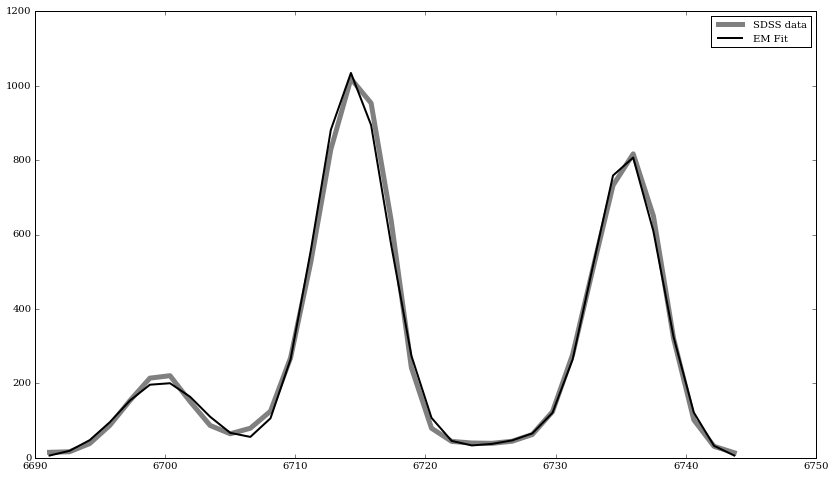

In [10]:
#Using SDSS data via bossdata tool
import bossdata

#Getting flux data for object
finder = bossdata.path.Finder()
mirror = bossdata.remote.Manager()
Fiber = bossdata.spec.SpecFile(mirror.get(finder.get_spec_path(3953,55322,4)))
data = Fiber.get_valid_data()
wlen,flux,dflux = data['wavelength'][:],data['flux'][:],data['dflux'][:]
model = Fiber.hdulist[1]['model'][:]
offset = flux - model
#Choosing small subsample around multiple emission lines
peak = np.argmax(flux)
testy = np.copy(offset[peak-15:peak+20])
testx = np.copy(wlen[peak-15:peak+20])

#Setting number of gaussians to fit
J = 5
#Setting starting guess values for mu, sigma, alpha
avg = np.sum(testx*testy) / np.sum(testy)
var = np.sum(testy*np.power(testx-avg,2)) / (np.sum(testy)-1)
std = np.sqrt(var)
s = std * np.ones(J)
a = np.ones(J) / J
m = np.random.choice(testx, J)
w = np.zeros((J,len(testx)))
sig = np.zeros(J, dtype = bool)
mu = np.zeros(J, dtype = bool)
alph = np.zeros(J, dtype = bool)

#Start iterating over function
for k in range(50):
    for j in range(J):
        for i in range(len(testx)):
            #Creating omega matrix
            w[j][i] = (a[j] * Gauss(testx[i], m[j], s[j]) /
                       np.sum([a[l] * Gauss(testx[i], m[l], s[l]) for l in range(J)]))
        #Solving for new mu, sigma, alpha values & test against tolerance
        m1 = np.sum(w[j]*testx*testy) / np.sum(w[j]*testy)
        if np.abs(m1 - m[j]) < 0.1:
            mu[j] = True
        else:
            mu[j] = False
        m[j] = m1
        s1 = np.sqrt(np.sum(w[j]*testy*np.power(testx-m[j],2)) /
                     np.sum(w[j]*testy))
        if np.abs(s1 - s[j]) < 0.05:
            sig[j] = True
        else:
            sig[j] = False
        s[j] = s1
        a1 = np.sum(w[j]*testy) / np.sum(testy)
        if np.abs(a1 - a[j]) < 0.1:
            alph[j] = True
        else:
            alph[j] = False
        a[j] = a1
    if mu.all() and sig.all() and alph.all():
        print('Convergence to tolerance after {} iterations:'.format(k))
        break

#Ploting comparison to data
plt.figure(figsize = (14,8))
plt.plot(testx,testy, label = 'SDSS data', color = 'grey', linewidth = 5)
#plt.fill_between(testx,testy-dflux[peak-15:peak+20], testy + dflux[peak-15:peak+20])
g = np.sum([a[j]*Gauss(testx,m[j],s[j]) for j in range(J)], axis = 0)
plt.plot(testx,g * np.trapz(testy,testx), label = 'EM Fit', color = 'black', linewidth = 2)
plt.legend()
plt.show()